In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import measure

In [2]:
data_path = ''
file_noise = 'gaussian_noise_peppers.png'
file_saltpepper = 'saltandpepper_noise_peppers.png'
file_sharp = 'peppers.png'
file_rice = 'rice.png'

In [3]:
def print_images(list_of_images):
    fig, ax = plt.subplots(1, len(list_of_images), figsize=(20,20))
    for i, (img,name) in enumerate(list_of_images):
        ax[i].set_title(str(name))
        ax[i].imshow(img);

# Q.1 Filtering

## Q.1.1 Denoising

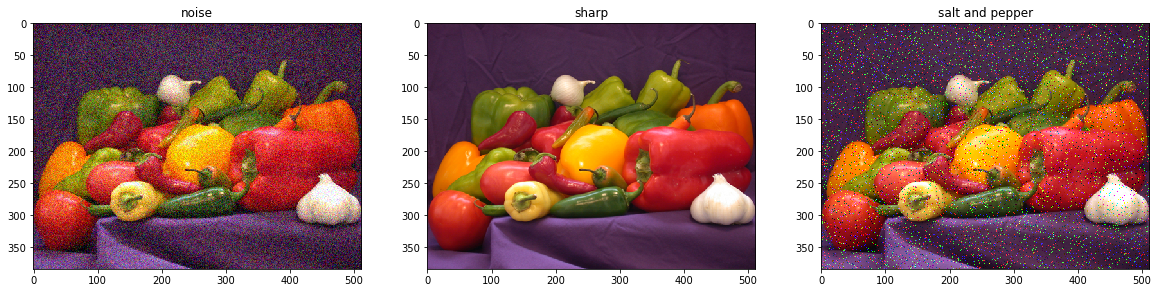

In [4]:
# Getting images and convert to BGR
img_noise = cv2.imread(data_path + file_noise)[:, :, ::-1]
img_sharp = cv2.imread(data_path + file_sharp)[:, :, ::-1]
img_saltpapper = cv2.imread(data_path + file_saltpepper)[:, :, ::-1]
print_images([(img_noise, 'noise'), (img_sharp, 'sharp'), (img_saltpapper, 'salt and pepper')])

### Part 1

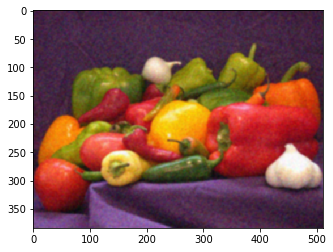

In [5]:
# Gaussian filter
gaussian_filter_img = cv2.GaussianBlur(img_noise, ksize = (7,7), sigmaX = np.sqrt(2))
a = plt.imshow(gaussian_filter_img)

### Part 2

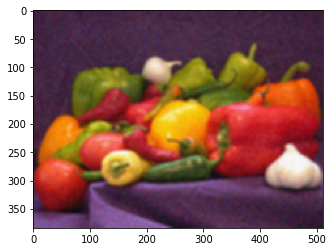

In [6]:
# Box filter
box_filter_img = cv2.blur(img_noise, (7,7))
a = plt.imshow(box_filter_img)

### Part 3

In [7]:
# PSNR
def get_psnr(img_original, img_blur):
    return measure.compare_psnr(img_original, img_blur)

In [8]:
# PSNR for box filter
print("The PSNR for the box filter is equal to %s." % (get_psnr(img_sharp, box_filter_img)))
# PSNR for gaussian filter
print("The PSNR for the gaussian filter is equal to %s." % (get_psnr(img_sharp, gaussian_filter_img)))

The PSNR for the box filter is equal to 28.2783964769.
The PSNR for the gaussian filter is equal to 29.879271671.


The best filter is the __gaussian filter__.

### Part 4

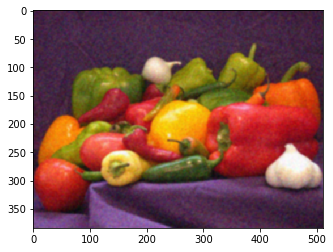

In [9]:
# Gausian filter on salt and papper noise
gaussian_filter_img_saltpepper = cv2.GaussianBlur(img_saltpapper, ksize = (7,7), sigmaX = np.sqrt(2))
a = plt.imshow(gaussian_filter_img)

### Part 5

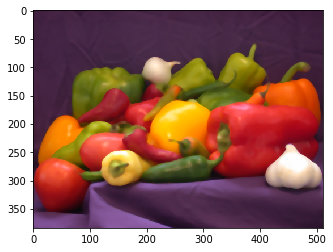

In [10]:
# Median filter on salt and pepper 
median_filter_img_saltpepper = cv2.medianBlur(img_saltpapper, 7)
a = plt.imshow(median_filter_img_saltpepper)

### Part 6

In [11]:
# PSNR for box filter
print("The PSNR for the median filter is equal to %s." % (get_psnr(img_sharp, median_filter_img_saltpepper)))
# PSNR for gaussian filter
print("The PSNR for the gaussian filter is equal to %s." % (get_psnr(img_sharp, gaussian_filter_img_saltpepper)))

The PSNR for the median filter is equal to 31.8710099206.
The PSNR for the gaussian filter is equal to 28.1671611567.


The __median filter__ give better results on the salt and pepper image.